In [7]:
import pandas as pd
print(pd.__version__)


2.1.1


In [18]:
import pandas as pd
import serial
import re
from time import sleep

# Set up the serial connection (adjust COM port and baud rate according to your setup)
ser = serial.Serial('COM3', 9600)  # Replace 'COM3' with your Arduino's serial port
sleep(2)  # Wait for the connection to establish

# Prepare the DataFrame
columns = ['Slot1ID', 'Slot2ID', 'Slot3ID', 'Slot1Sensor', 'Slot2Sensor', 'Slot3Sensor',
           'MQ4Value', 'MQ5Value', 'MQ6Value', 'MQ9Value', 'DHTHumidity', 'DHTTemperature',
           'BMPPressure', 'BMPTemperature', 'NEWTEMPTemperature']
data = {col: [] for col in columns}
df = pd.DataFrame(data)

def parse_serial_data(line):
    print("Raw line:", line)  # Debug print
    readings = {}
    slots = line.split(';')
    for slot in slots:
        if "Slot" in slot:
            slot_number = slot.split()[0]
            id_match = re.search(r'Id: (\d+), (\w+)', slot)
            if id_match:
                readings[f'{slot_number}ID'] = id_match.group(1)

            sensor_match = re.search(r'Slot\d+ Id: \d+, (\w+),', slot)
            if sensor_match:
                sensor = sensor_match.group(1)
                readings[f'{slot_number}Sensor'] = sensor
                if sensor != "None":
                    if sensor == "MQ9":
                        readings['MQ9Value'] = re.search(r'MQ9, Gas Value: (\d+)', slot).group(1)
                    elif sensor == "MQ4":
                        readings['MQ4Value'] = re.search(r'MQ4, Gas Value: (\d+)', slot).group(1)
                    elif sensor == "MQ5":
                        readings['MQ5Value'] = re.search(r'MQ5, Gas Value: (\d+)', slot).group(1)
                    elif sensor == "MQ6":
                        readings['MQ6Value'] = re.search(r'MQ6, Gas Value: (\d+)', slot).group(1)
                    elif sensor == "DHT":
                        readings['DHTHumidity'] = re.search(r'Humidity: ([\d.]+)', slot).group(1)
                        readings['DHTTemperature'] = re.search(r'Temp: ([\d.]+)', slot).group(1)
                    elif sensor == "BMP":
                        readings['BMPPressure'] = re.search(r'Pressure: ([\d.]+)', slot).group(1)
                        readings['BMPTemperature'] = re.search(r'Temp: ([\d.]+)', slot).group(1)
                    elif sensor == "New Temp":
                        readings['NEWTEMPTemperature'] = re.search(r'Value: ([\d.]+)', slot).group(1)
            else:
                readings[f'{slot_number}Sensor'] = 'None'
    print("Parsed data:", readings)  # Debug print
    return readings

try:
    while True:
        if ser.in_waiting > 0:
            line = ser.readline().decode('utf-8').strip()
            print(line)  # For debugging
            parsed_data = parse_serial_data(line)
            df = pd.concat([df, pd.DataFrame([parsed_data])], ignore_index=True)
except KeyboardInterrupt:
    ser.close()
    print("Serial connection closed.")

# Optional: Save DataFrame to a CSV file
df.to_csv('sensor_readings.csv', index=False)

Slot1 Id: 2, New Temp, Value: 327; Slot2 Id: 154, MQ9, Gas Value: 182; Slot3 Id: 281, BMP, Pressure: 782.00, Temp: 22.31;
Raw line: Slot1 Id: 2, New Temp, Value: 327; Slot2 Id: 154, MQ9, Gas Value: 182; Slot3 Id: 281, BMP, Pressure: 782.00, Temp: 22.31;
Parsed data: {'Slot1ID': '2', 'Slot1Sensor': 'None', 'Slot2ID': '154', 'Slot2Sensor': 'MQ9', 'MQ9Value': '182', 'Slot3ID': '281', 'Slot3Sensor': 'BMP', 'BMPPressure': '782.00', 'BMPTemperature': '22.31'}
Slot1 Id: 3, New Temp, Value: 326; Slot2 Id: 153, MQ9, Gas Value: 182; Slot3 Id: 282, BMP, Pressure: 782.00, Temp: 22.31;
Raw line: Slot1 Id: 3, New Temp, Value: 326; Slot2 Id: 153, MQ9, Gas Value: 182; Slot3 Id: 282, BMP, Pressure: 782.00, Temp: 22.31;
Parsed data: {'Slot1ID': '3', 'Slot1Sensor': 'None', 'Slot2ID': '153', 'Slot2Sensor': 'MQ9', 'MQ9Value': '182', 'Slot3ID': '282', 'Slot3Sensor': 'BMP', 'BMPPressure': '782.00', 'BMPTemperature': '22.31'}
Slot1 Id: 2, New Temp, Value: 327; Slot2 Id: 153, MQ9, Gas Value: 182; Slot3 Id: 282

In [24]:
import pandas as pd
import serial
import re
from time import sleep

# Set up the serial connection (adjust COM port and baud rate according to your setup)
ser = serial.Serial('COM3', 9600)  # Replace 'COM3' with your Arduino's serial port
sleep(2)  # Wait for the connection to establish

# Prepare the DataFrame
columns = ['Slot1ID', 'Slot2ID', 'Slot3ID', 'Slot1Sensor', 'Slot2Sensor', 'Slot3Sensor',
           'MQ4Value', 'MQ5Value', 'MQ6Value', 'MQ9Value', 'DHTHumidity', 'DHTTemperature',
           'BMPPressure', 'BMPTemperature', 'NEWTEMPTemperature']
data = {col: [] for col in columns}
df = pd.DataFrame(data)

def parse_serial_data(line):
    #print("Raw line:", line)  # Debug print
    readings = {}
    slots = line.split(';')
    for slot in slots:
        if "Slot" in slot:
            slot_number = slot.split()[0]
            id_match = re.search(r'Id: (\d+), ([\w\s]+),', slot)
            if id_match:
                readings[f'{slot_number}ID'] = id_match.group(1)
                sensor = id_match.group(2).strip()
                readings[f'{slot_number}Sensor'] = sensor
                if sensor != "None":
                    if sensor == "MQ9":
                        readings['MQ9Value'] = re.search(r'MQ9, Gas Value: (\d+)', slot).group(1)
                    elif sensor == "MQ4":
                        readings['MQ4Value'] = re.search(r'MQ4, Gas Value: (\d+)', slot).group(1)
                    elif sensor == "MQ5":
                        readings['MQ5Value'] = re.search(r'MQ5, Gas Value: (\d+)', slot).group(1)
                    elif sensor == "MQ6":
                        readings['MQ6Value'] = re.search(r'MQ6, Gas Value: (\d+)', slot).group(1)
                    elif sensor == "DHT":
                        readings['DHTHumidity'] = re.search(r'Humidity: ([\d.]+)', slot).group(1)
                        readings['DHTTemperature'] = re.search(r'Temp: ([\d.]+)', slot).group(1)
                    elif sensor == "BMP":
                        readings['BMPPressure'] = re.search(r'Pressure: ([\d.]+)', slot).group(1)
                        readings['BMPTemperature'] = re.search(r'Temp: ([\d.]+)', slot).group(1)
                    elif sensor == "New Temp":
                        readings['NEWTEMPTemperature'] = re.search(r'Value: ([\d.]+)', slot).group(1)
            else:
                readings[f'{slot_number}Sensor'] = 'None'
    print("Parsed data:", readings)  # Debug print
    return readings


try:
    while True:
        if ser.in_waiting > 0:
            line = ser.readline().decode('utf-8').strip()
            print(line)  # For debugging
            parsed_data = parse_serial_data(line)
            df = pd.concat([df, pd.DataFrame([parsed_data])], ignore_index=True)
except KeyboardInterrupt:
    ser.close()
    print("Serial connection closed.")

# Optional: Save DataFrame to a CSV file
df.to_csv('sensor_readings.csv', index=False)


Slot1 Id: 427, None; Slot2 Id: 432, None; Slot3 Id: 423, None;
Parsed data: {'Slot1Sensor': 'None', 'Slot2Sensor': 'None', 'Slot3Sensor': 'None'}
Slot1 Id: 338, None; Slot2 Id: 345, None; Slot3 Id: 336, None;
Parsed data: {'Slot1Sensor': 'None', 'Slot2Sensor': 'None', 'Slot3Sensor': 'None'}
Slot1 Id: 408, None; Slot2 Id: 411, None; Slot3 Id: 395, None;
Parsed data: {'Slot1Sensor': 'None', 'Slot2Sensor': 'None', 'Slot3Sensor': 'None'}
Slot1 Id: 677, None; Slot2 Id: 598, None; Slot3 Id: 909, None;
Parsed data: {'Slot1Sensor': 'None', 'Slot2Sensor': 'None', 'Slot3Sensor': 'None'}
Slot1 Id: 283, None; Slot2 Id: 317, None; Slot3 Id: 284, BMP, Pressure: 782.00, Temp: 22.31;
Parsed data: {'Slot1Sensor': 'None', 'Slot2Sensor': 'None', 'Slot3ID': '284', 'Slot3Sensor': 'BMP', 'BMPPressure': '782.00', 'BMPTemperature': '22.31'}
Slot1 Id: 281, None; Slot2 Id: 0, None; Slot3 Id: 284, BMP, Pressure: 782.00, Temp: 22.31;
Parsed data: {'Slot1Sensor': 'None', 'Slot2Sensor': 'None', 'Slot3ID': '284', 'S

In [37]:
import pandas as pd
import serial
import re
from time import sleep

# Set up the serial connection (adjust COM port and baud rate according to your setup)
ser = serial.Serial('COM3', 9600)  # Replace 'COM3' with your Arduino's serial port
sleep(2)  # Wait for the connection to establish

# Prepare the DataFrame
columns = ['Slot1ID', 'Slot2ID', 'Slot3ID', 'Slot1Sensor', 'Slot2Sensor', 'Slot3Sensor',
           'MQ4Value', 'MQ5Value', 'MQ6Value', 'MQ9Value', 'DHTHumidity', 'DHTTemperature',
           'BMPPressure', 'BMPTemperature', 'NEWTEMPTemperature']
data = {col: [] for col in columns}
df = pd.DataFrame(data)

def parse_serial_data(line):
    #print("Raw line:", line)  # Debug print
    readings = {}
    slots = line.split(';')
    for slot in slots:
        if "Slot" in slot:
            slot_number = slot.split()[0]
            
            # Extract the ID value
            id_match = re.search(r'Id: (\d+)', slot)
            if id_match:
                readings[f'{slot_number}ID'] = id_match.group(1)
            
            # Extract the sensor type
            sensor_match = re.search(r'Id: \d+, ([\w\s]+)', slot)
            if sensor_match:
                sensor = sensor_match.group(1).strip()
                readings[f'{slot_number}Sensor'] = sensor

                # Extract sensor values based on sensor type
                if sensor == "MQ9":
                    readings['MQ9Value'] = re.search(r'MQ9, Gas Value: (\d+)', slot).group(1)
                elif sensor == "MQ4":
                    readings['MQ4Value'] = re.search(r'MQ4, Gas Value: (\d+)', slot).group(1)
                elif sensor == "MQ5":
                    readings['MQ5Value'] = re.search(r'MQ5, Gas Value: (\d+)', slot).group(1)
                elif sensor == "MQ6":
                    readings['MQ6Value'] = re.search(r'MQ6, Gas Value: (\d+)', slot).group(1)
                elif sensor == "DHT":
                    readings['DHTHumidity'] = re.search(r'Humidity: ([\d.]+)', slot).group(1)
                    readings['DHTTemperature'] = re.search(r'Temp: ([\d.]+)', slot).group(1)
                elif sensor == "BMP":
                    readings['BMPPressure'] = re.search(r'Pressure: ([\d.]+)', slot).group(1)
                    readings['BMPTemperature'] = re.search(r'Temp: ([\d.]+)', slot).group(1)
                elif sensor == "New Temp":
                    readings['NEWTEMPTemperature'] = re.search(r'Value: ([\d.]+)', slot).group(1)
            else:
                readings[f'{slot_number}Sensor'] = 'None'
    #print("Parsed data:", readings)  # Debug print
    print(readings['Slot1Sensor'],readings['Slot2Sensor'],readings['Slot3Sensor'])
    return readings

try:
    while True:
        if ser.in_waiting > 0:
            line = ser.readline().decode('utf-8').strip()
            #print(line)  # For debugging
            parsed_data = parse_serial_data(line)
            df = pd.concat([df, pd.DataFrame([parsed_data])], ignore_index=True)
except KeyboardInterrupt:
    ser.close()
    print("Serial connection closed.")

# Optional: Save DataFrame to a CSV file
df.to_csv('sensor_readings.csv', index=False)


None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None DHT BMP
None DHT BMP
None DHT BMP
None DHT BMP
None DHT BMP
None DHT BMP
None DHT BMP
None DHT BMP
None DHT BMP
None DHT BMP
None DHT BMP
None DHT BMP
None DH

In [63]:
import pandas as pd
import serial
import re
from time import sleep, time
import datetime


# Set up the serial connection (adjust COM port and baud rate according to your setup)
ser = serial.Serial('COM3', 9600)  # Replace 'COM3' with your Arduino's serial port
sleep(2)  # Wait for the connection to establish

# Prepare the DataFrame
columns = ['DateTime','SecondsElapsed','Slot1ID', 'Slot2ID', 'Slot3ID', 'Slot1Sensor', 'Slot2Sensor', 'Slot3Sensor',
           'MQ4Value', 'MQ5Value', 'MQ6Value', 'MQ9Value', 'DHTHumidity', 'DHTTemperature',
           'BMPPressure', 'BMPTemperature', 'NEWTEMPTemperature']
data = {col: [] for col in columns}
df2 = pd.DataFrame(data)

start_time = time()

def parse_serial_data(line):
    #print(line)  # Debug print
    readings = {}
    slots = line.split(';')
    for slot in slots:
        if "Slot" in slot:
            slot_number = slot.split()[0]
            
            # Extract the ID value
            id_match = re.search(r'Id: (\d+)', slot)
            if id_match:
                readings[f'{slot_number}ID'] = id_match.group(1)
            
            # Extract the sensor type
            sensor_match = re.search(r'Id: \d+, ([\w\s]+)', slot)
            if sensor_match:
                sensor = sensor_match.group(1).strip()
                readings[f'{slot_number}Sensor'] = sensor

                # Extract sensor values based on sensor type
                if sensor == "MQ9":
                    readings['MQ9Value'] = re.search(r'MQ9, Gas Value: (\d+)', slot).group(1)
                elif sensor == "MQ4":
                    readings['MQ4Value'] = re.search(r'MQ4, Gas Value: (\d+)', slot).group(1)
                elif sensor == "MQ5":
                    readings['MQ5Value'] = re.search(r'MQ5, Gas Value: (\d+)', slot).group(1)
                elif sensor == "MQ6":
                    readings['MQ6Value'] = re.search(r'MQ6, Gas Value: (\d+)', slot).group(1)
                elif sensor == "DHT":
                    readings['DHTHumidity'] = re.search(r'Humidity: ([\d.]+)', slot).group(1)
                    readings['DHTTemperature'] = re.search(r'Temp: ([\d.]+)', slot).group(1)
                elif sensor == "BMP":
                    readings['BMPPressure'] = re.search(r'Pressure: ([\d.]+)', slot).group(1)
                    readings['BMPTemperature'] = re.search(r'Temp: ([\d.]+)', slot).group(1)
                elif sensor == "New Temp":
                    readings['NEWTEMPTemperature'] = re.search(r'Value: ([\d.]+)', slot).group(1)
            else:
                readings[f'{slot_number}Sensor'] = 'None'
    #print("Parsed data:", readings)  # Debug print
    print(readings['Slot1Sensor'],readings['Slot2Sensor'],readings['Slot3Sensor'])
#    print(readings['MQ4Value'],readings['MQ5Value'],readings['MQ6Value'],readings['MQ9Value'],readings['BMPPressure'])
    return readings

try:
    while True:
        if ser.in_waiting > 0:
            line = ser.readline().decode('utf-8').strip()
            #print(line)  # For debugging
            parsed_data2 = parse_serial_data(line)
            current_time = datetime.datetime.now()
            elapsed_time = time() - start_time
            parsed_data2['DateTime'] = current_time
            parsed_data2['SecondsElapsed'] = elapsed_time
            df2 = pd.concat([df2, pd.DataFrame([parsed_data2])], ignore_index=True)
except KeyboardInterrupt:
    ser.close()
    print("Serial connection closed.")

# Optional: Save DataFrame to a CSV file
df2.to_csv('sensor_readings2.csv', index=False)


None None None


C:\Users\jonas\AppData\Local\Temp\ipykernel_43028\2226354186.py:74: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df2 = pd.concat([df2, pd.DataFrame([parsed_data2])], ignore_index=True)


None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None B

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 0: invalid start byte

In [56]:
df2

,Slot1ID,Slot2ID,Slot3ID,Slot1Sensor,Slot2Sensor,Slot3Sensor,MQ4Value,MQ5Value,MQ6Value,MQ9Value,DHTHumidity,DHTTemperature,BMPPressure,BMPTemperature,NEWTEMPTemperature,DateTime,SecondsElapsed
0,153,2,282,MQ9,New Temp,BMP,NaN,NaN,NaN,180,NaN,NaN,782.00,22.31,388,2024-01-18 22:11:50.280307,3917.603218


In [64]:
df2.to_csv('sensor_readings3.csv', index=False)

In [69]:
import pandas as pd
df2 = pd.read_csv('sensor_readings3.csv')

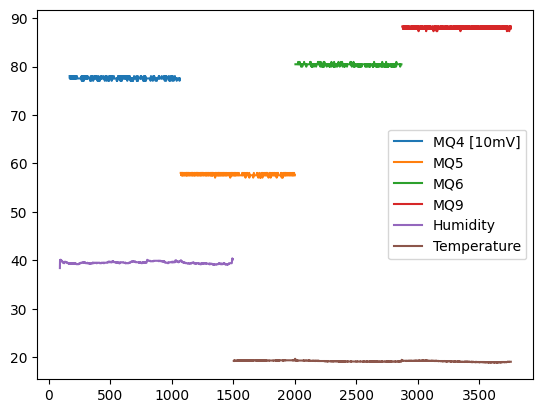

In [103]:
import matplotlib.pyplot as plt

#plt.plot(df3['SecondsElapsed'],df2['BMPPressure']/1,label='Pressure')
plt.plot(df2['SecondsElapsed'],df2['MQ4Value']/205*100,label='MQ4 [10mV]')
plt.plot(df2['SecondsElapsed'],df2['MQ5Value']/205*100,label='MQ5')
plt.plot(df2['SecondsElapsed'],df2['MQ6Value']/205*100,label='MQ6')
plt.plot(df2['SecondsElapsed'],df2['MQ9Value']/205*100,label='MQ9')
plt.plot(df2['SecondsElapsed'],df2['DHTHumidity'],label='Humidity [%]')
plt.plot(df2['SecondsElapsed'],df2['NEWTEMPTemperature']/20,label='Temperature [grader C]')
plt.legend()

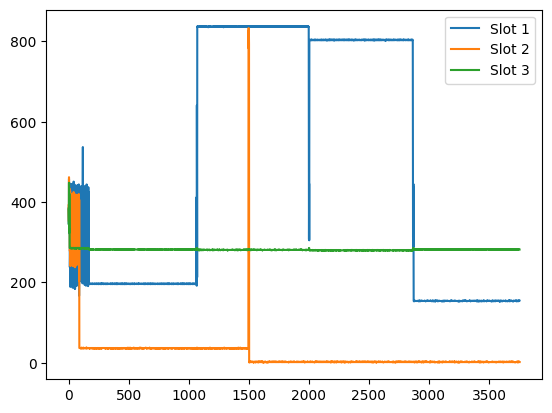

In [77]:
plt.plot(df2['SecondsElapsed'],df2['Slot1ID'],label='Slot 1')
plt.plot(df2['SecondsElapsed'],df2['Slot2ID'],label='Slot 2')
plt.plot(df2['SecondsElapsed'],df2['Slot3ID'],label='Slot 3')
plt.legend()

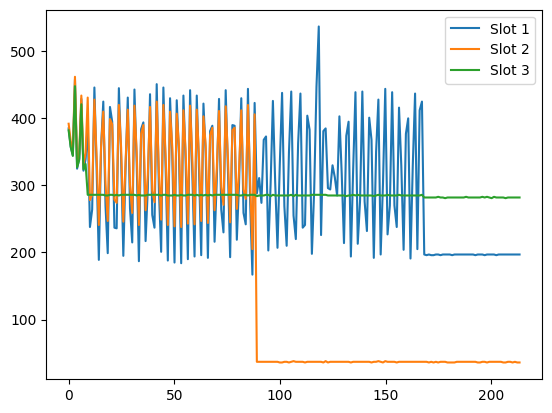

In [105]:
plt.plot(df2['SecondsElapsed'].head(200),df2['Slot1ID'].head(200),label='Slot 1')
plt.plot(df2['SecondsElapsed'].head(200),df2['Slot2ID'].head(200),label='Slot 2')
plt.plot(df2['SecondsElapsed'].head(200),df2['Slot3ID'].head(200),label='Slot 3')
plt.legend()

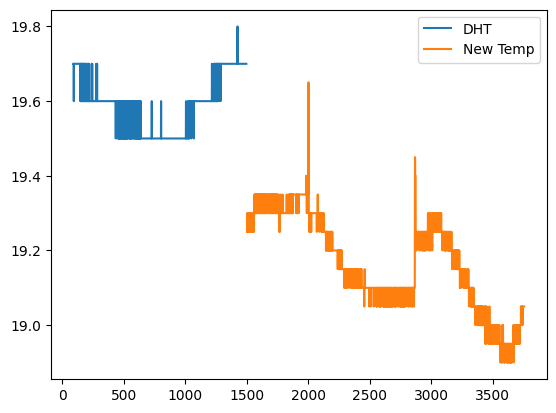

In [82]:
plt.plot(df2['SecondsElapsed'],df2['DHTTemperature'],label='DHT')
#plt.plot(df2['SecondsElapsed'],df2['BMPTemperature'],label='BMP')
plt.plot(df2['SecondsElapsed'],df2['NEWTEMPTemperature']/100*5,label='New Temp')
plt.legend()

In [116]:
import pandas as pd
import serial
import re
from time import sleep, time
import datetime


# Set up the serial connection (adjust COM port and baud rate according to your setup)
ser = serial.Serial('COM3', 9600)  # Replace 'COM3' with your Arduino's serial port
sleep(2)  # Wait for the connection to establish

# Prepare the DataFrame
columns = ['DateTime','SecondsElapsed','Slot1ID', 'Slot2ID', 'Slot3ID', 'Slot1Sensor', 'Slot2Sensor', 'Slot3Sensor',
           'MQ4Value', 'MQ5Value', 'MQ6Value', 'MQ9Value', 'DHTHumidity', 'DHTTemperature',
           'BMPPressure', 'BMPTemperature', 'NEWTEMPTemperature']
data = {col: [] for col in columns}
df2 = pd.DataFrame(data)

start_time = time()

def parse_serial_data(line):
    #print(line)  # Debug print
    readings = {}
    slots = line.split(';')
    for slot in slots:
        if "Slot" in slot:
            slot_number = slot.split()[0]
            
            # Extract the ID value
            id_match = re.search(r'Id: (\d+)', slot)
            if id_match:
                readings[f'{slot_number}ID'] = id_match.group(1)
            
            # Extract the sensor type
            sensor_match = re.search(r'Id: \d+, ([\w\s]+)', slot)
            if sensor_match:
                sensor = sensor_match.group(1).strip()
                readings[f'{slot_number}Sensor'] = sensor

                # Extract sensor values based on sensor type
                if sensor == "MQ9":
                    readings['MQ9Value'] = re.search(r'MQ9, Gas Value: (\d+)', slot).group(1)
                elif sensor == "MQ4":
                    readings['MQ4Value'] = re.search(r'MQ4, Gas Value: (\d+)', slot).group(1)
                elif sensor == "MQ5":
                    readings['MQ5Value'] = re.search(r'MQ5, Gas Value: (\d+)', slot).group(1)
                elif sensor == "MQ6":
                    readings['MQ6Value'] = re.search(r'MQ6, Gas Value: (\d+)', slot).group(1)
                elif sensor == "DHT":
                    readings['DHTHumidity'] = re.search(r'Humidity: ([\d.]+)', slot).group(1)
                    readings['DHTTemperature'] = re.search(r'Temp: ([\d.]+)', slot).group(1)
                elif sensor == "BMP":
                    readings['BMPPressure'] = re.search(r'Pressure: ([\d.]+)', slot).group(1)
                    readings['BMPTemperature'] = re.search(r'Temp: ([\d.]+)', slot).group(1)
                elif sensor == "New Temp":
                    readings['NEWTEMPTemperature'] = re.search(r'Value: ([\d.]+)', slot).group(1)
            else:
                readings[f'{slot_number}Sensor'] = 'None'
    #print("Parsed data:", readings)  # Debug print
    print(readings['Slot1Sensor'],readings['Slot2Sensor'],readings['Slot3Sensor'])
#    print(readings['MQ4Value'],readings['MQ5Value'],readings['MQ6Value'],readings['MQ9Value'],readings['BMPPressure'])
    return readings

try:
    while True:
        if ser.in_waiting > 0:
            line = ser.readline().decode('utf-8').strip()
            #print(line)  # For debugging
            parsed_data2 = parse_serial_data(line)
            current_time = datetime.datetime.now()
            elapsed_time = time() - start_time
            parsed_data2['DateTime'] = current_time
            parsed_data2['SecondsElapsed'] = elapsed_time
            df2 = pd.concat([df2, pd.DataFrame([parsed_data2])], ignore_index=True)
except KeyboardInterrupt:
    ser.close()
    print("Serial connection closed.")

# Optional: Save DataFrame to a CSV file
df2.to_csv('sensor_readings4.csv', index=False)


None None None


C:\Users\jonas\AppData\Local\Temp\ipykernel_43028\1386915486.py:74: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df2 = pd.concat([df2, pd.DataFrame([parsed_data2])], ignore_index=True)


None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None None
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None BMP
None None 

In [118]:
import pandas as pd
df3 = pd.read_csv('sensor_readings4.csv')

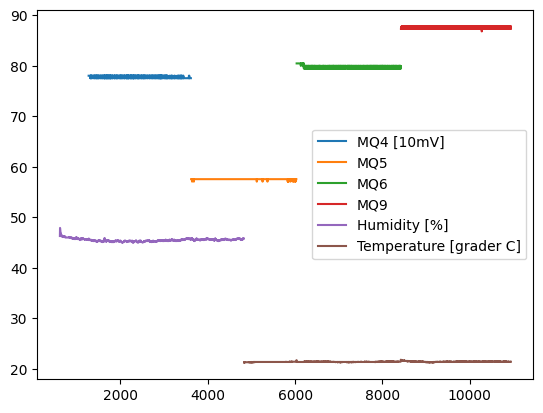

In [119]:
import matplotlib.pyplot as plt

#plt.plot(df2['SecondsElapsed'],df2['BMPPressure']/1,label='Pressure')
plt.plot(df3['SecondsElapsed'],df3['MQ4Value']/205*100,label='MQ4 [10mV]')
plt.plot(df3['SecondsElapsed'],df3['MQ5Value']/205*100,label='MQ5')
plt.plot(df3['SecondsElapsed'],df3['MQ6Value']/205*100,label='MQ6')
plt.plot(df3['SecondsElapsed'],df3['MQ9Value']/205*100,label='MQ9')
plt.plot(df3['SecondsElapsed'],df3['DHTHumidity'],label='Humidity [%]')
plt.plot(df3['SecondsElapsed'],df3['NEWTEMPTemperature']/20,label='Temperature [grader C]')
plt.legend()

In [126]:
df3['MQ4Value'].notna().sum()

2130

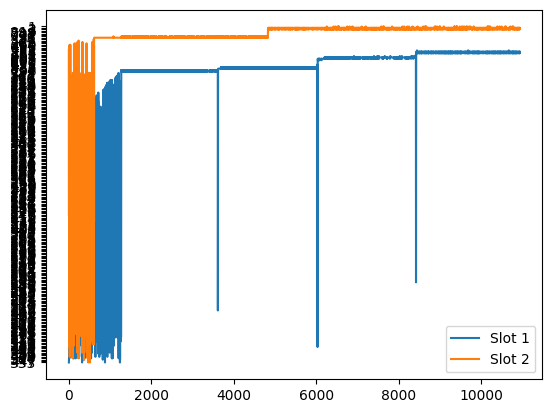

In [121]:
plt.plot(df2['SecondsElapsed'],df2['Slot1ID'],label='Slot 1')
plt.plot(df2['SecondsElapsed'],df2['Slot2ID'],label='Slot 2')
#plt.plot(df2['SecondsElapsed'],df2['Slot3ID'],label='Slot 3')
plt.legend()